# Experimental Modal Analisys

Author: Ian Viotti, 2022

This script aims to verify and plot the modal paraameters of the plate by ploting the imaginary part of the frequency response function (FRF) obteined by testing.

In [1]:
import numpy as np
import pandas as pd
import os 
from mpl_toolkits import mplot3d
from scipy import interpolate
from bisect import bisect

import matplotlib.pyplot as plt 

## Read the results

In [2]:
plate = 'placa sem dano'

In [3]:
path = os.path.abspath(os.getcwd())
os.chdir('..')
os.chdir('..')
path = os.path.abspath(os.getcwd())
plate_dir = os.path.join(path,'7 - Experimental',plate)

In [4]:
data_files = os.listdir(plate_dir)

In [5]:
ImFRF = []
for file in data_files:
    if 'ImFRF' in file:
        data_xlsx = pd.read_excel(os.path.join(plate_dir,f'{file}'))
        data_np = data_xlsx.to_numpy()
        ImFRF.append(data_np)
n_points = len(ImFRF)

In [9]:
w_exp = tuple([240.0, 475.0, 1160.0, 1690])

In [10]:
amplitude_list = []
for point in ImFRF:
    for i in w_exp:
        X = bisect(point.T[0], i)
        Y = point.T[1][X]
        amplitude_list.append(Y)

In [11]:
amplitude = np.array(np.array_split(np.array(amplitude_list),n_points))
np.array_split(amplitude.T[0],5)

[array([0.17463809, 0.18256719, 0.16592459, 0.16222183, 0.17167285,
        0.1802645 ]),
 array([0.14778797, 0.15396915, 0.12993984, 0.13271534, 0.12715155,
        0.1203652 ]),
 array([0.09945501, 0.11151443, 0.11518992, 0.11288184, 0.11454958,
        0.09508768]),
 array([0.04989187, 0.08191618, 0.07079251, 0.06190528, 0.06216602,
        0.05993809]),
 array([0.02382964, 0.02579551, 0.02771793, 0.0300928 , 0.03442191,
        0.02675508])]

In [24]:
os.getcwd()

'C:\\Users\\Ian\\Desktop\\Unifei\\GEMEC'

In [22]:
np.save('array.npy', amplitude)

In [11]:
np.hstack((np.zeros(6),amplitude.T[0],5))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09438188, 0.11275594, 0.11491994, 0.11653657,
       0.12104123, 0.12650622, 0.09625581, 0.10225366, 0.09124679,
       0.09465677, 0.08911671, 0.08720726, 0.06827973, 0.07901223,
       0.07888516, 0.08204095, 0.08627082, 0.06743193, 0.03590129,
       0.04836039, 0.04388355, 0.03564801, 0.03713326, 0.03640479,
       0.01383614, 0.01498555, 0.01654561, 0.01667767, 0.01863361,
       0.0149876 , 5.        ])

In [12]:
x_points = 6
y_points = 5

def plot_mode(mode, x_points, y_points, amplitude):
    # Creating dataset
    X = np.arange(1, x_points+1)
    Y = np.arange(1, y_points+1)
    X, Y = np.meshgrid(X, Y)
    Z = np.array(np.array_split(amplitude.T[mode-1],5))
        
    xnew, ynew = np.mgrid[1:x_points+1:80j,1:y_points+1:80j]
    tck = interpolate.bisplrep(X, Y, Z, s=0)
    znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)    
    
    # Creating figure
    fig = plt.figure(figsize =(10, 7))
    ax = plt.axes(projection ='3d')

    # Creating color map
    my_cmap = plt.get_cmap('plasma')

    # Creating plot
    surf = ax.plot_surface(xnew, znew, ynew,
                           cmap = my_cmap,
                           edgecolor ='none')

    fig.colorbar(surf, ax = ax,
                 shrink = 0.5, aspect = 5)

    ax.set_title('Surface plot')
    
    ax.view_init(-120, 60)

    # show plot
    #plt.show()

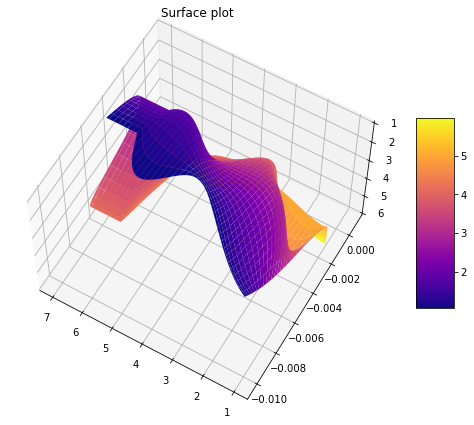

In [14]:
mode = 2
plot_mode(mode, x_points, y_points, amplitude)

<div>
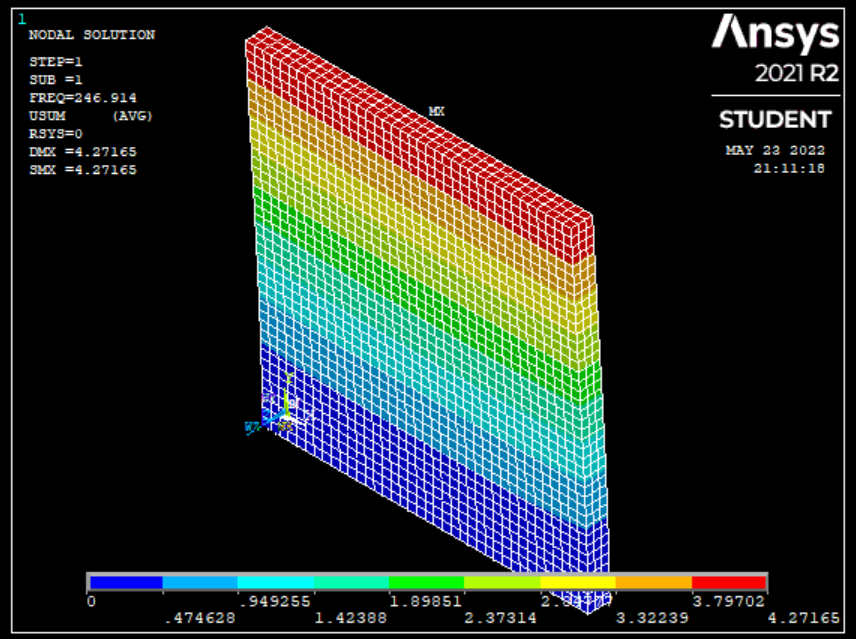
</div>


<div>
    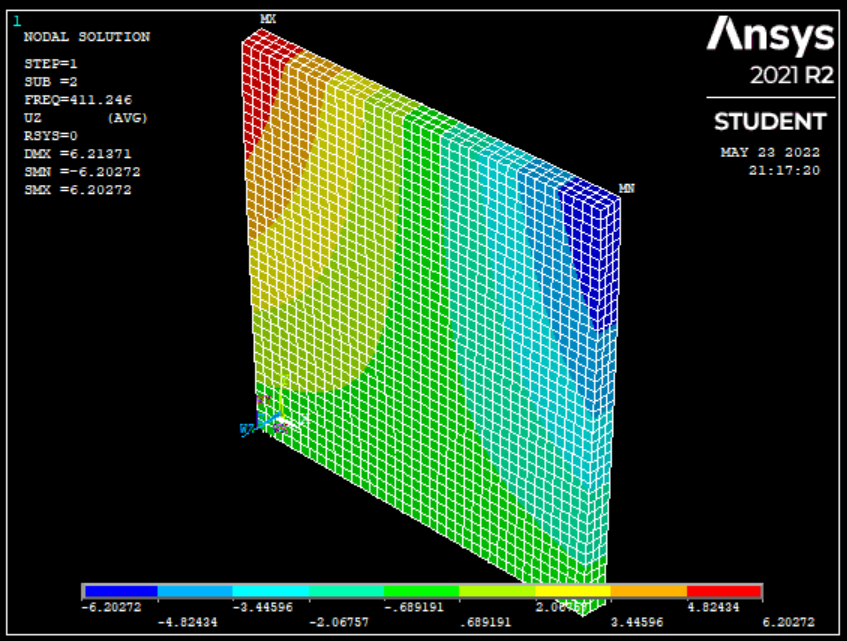
<div>


<div>
    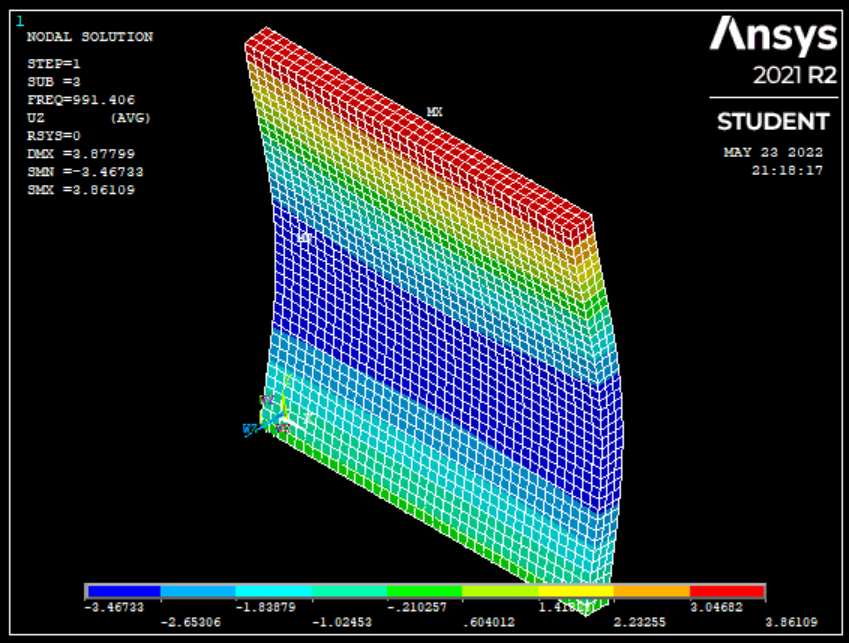
<div>
